In [1]:
import matplotlib.pyplot as plt
import ast
import json
import numpy as np
import sys
import statistics
from scipy import stats

In [2]:
#Get Accuracies
text_file = open("hm_accuracy.txt", "r")
accurs = text_file.read().split('\n')
accurs = accurs[:-1]
accurs = [float(x) for x in accurs]

In [3]:
#Get Gene Counts
with open("genecount_gtex.json") as f:
    gene_count_dict = json.load(f)

In [4]:
datasets = list(sorted(gene_count_dict.keys()))

In [5]:
gene_counts = list(gene_count_dict.values())

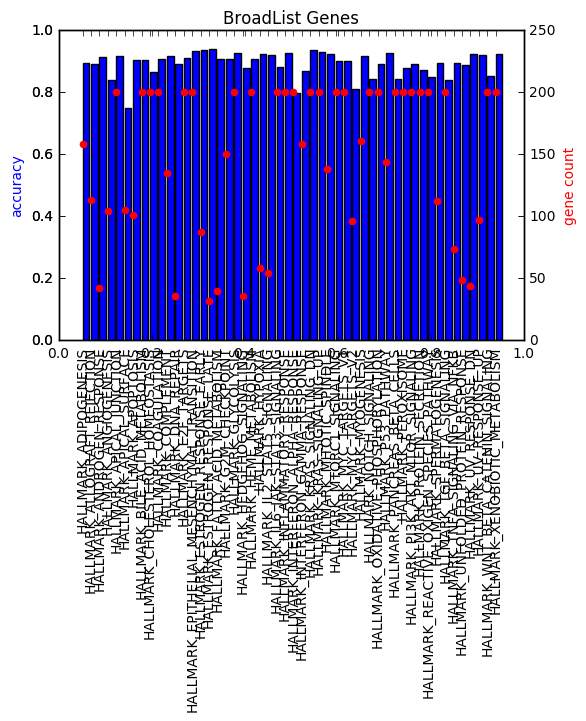

In [6]:
x = np.arange(len(datasets))

fig = plt.figure()
plt.title("BroadList Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax1 = fig.add_subplot(111)
ax2=fig.add_subplot(111, frame_on=False)

ax1.bar(x, accurs, color='b')
ax1.set_ylabel('accuracy',color='b')

ax2 = ax1.twinx()
ax2.scatter(x, gene_counts, color='r')
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('gene count', color='r')

plt.show()

In [7]:
ran_accurs = list()
#Get Accuracies
with open("random_accuracy.txt", "r") as f:
    for line in f:
        line = line.split('\t')
        line = line[1]
        ran_accurs.append(line)

ran_accurs = [x.replace('\n', '') for x in ran_accurs]
ran_accurs = [float(x) for x in ran_accurs]

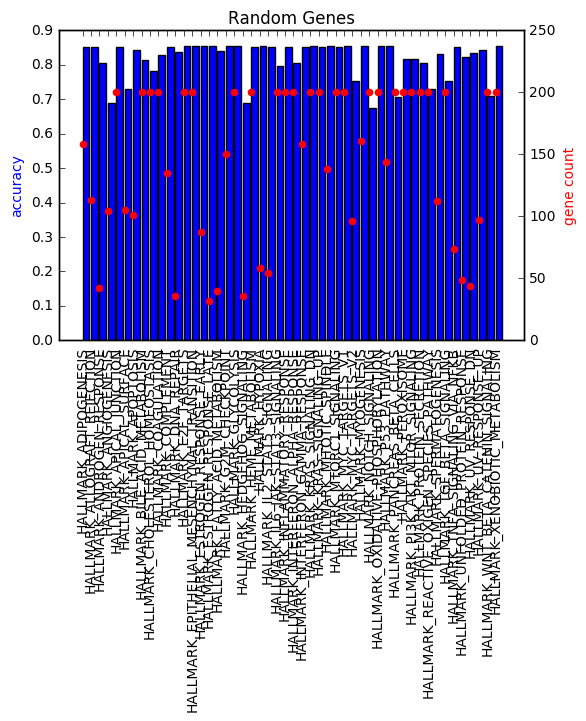

In [8]:
#plt.clf()

fig = plt.figure()
plt.title("Random Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax3 = fig.add_subplot(111)
ax4=fig.add_subplot(111)

ax3.bar(x,ran_accurs, color='b')
ax3.set_ylabel('accuracy',color='b')

ax4 = ax3.twinx()
ax4.scatter(x, gene_counts, color='r')
ax4.yaxis.tick_right()
ax4.xaxis.tick_bottom()
ax4.yaxis.set_label_position('right') 
ax4.set_ylabel('gene count', color='r')

plt.show()

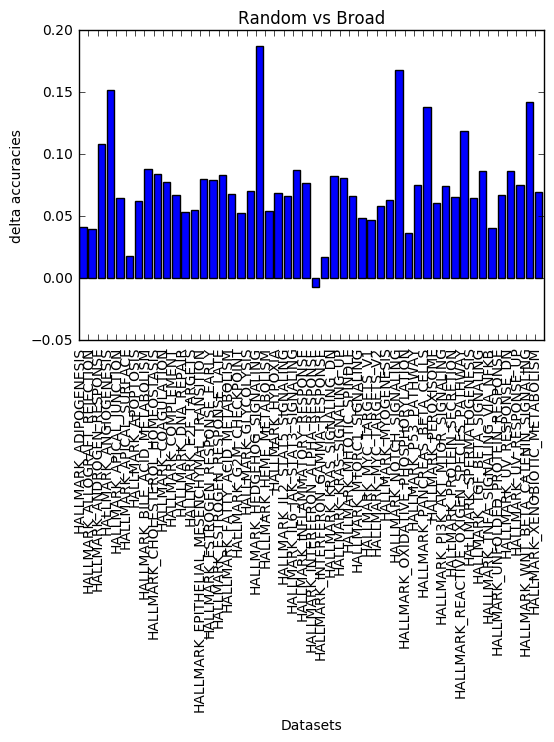

In [9]:
#write graph
x_range = np.arange(len(datasets))

accur_diff = [accurs[i]-ran_accurs[i] for i in range(len(ran_accurs))] 

plt.bar(x_range,accur_diff)
plt.title("Random vs Broad")
plt.ylabel('delta accuracies')
plt.xlabel('Datasets')
plt.xticks(x_range,datasets)
plt.xticks(rotation=90)
plt.show()

In [10]:
statistics.stdev(accurs)

0.03890525590653608

In [11]:
statistics.stdev(ran_accurs)

0.05302271610690156

In [13]:
accuracies_100 = np.load("accuracies.npy")
pval = np.zeros(50)

In [14]:
accuracies_100[5]

array([ 0.785411,  0.783481,  0.790814,  0.643767,  0.788499,  0.734465,
        0.72829 ,  0.745658,  0.742185,  0.783095,  0.808954,  0.696642,
        0.732922,  0.668468,  0.709379,  0.659205,  0.744114,  0.786569,
        0.690853,  0.71787 ,  0.74836 ,  0.755307,  0.627557,  0.718256,
        0.730992,  0.792744,  0.794288,  0.702817,  0.701274,  0.79506 ,
        0.729062,  0.691625,  0.66345 ,  0.761868,  0.722887,  0.774218,
        0.690467,  0.730606,  0.711308,  0.71787 ,  0.709379,  0.800077,
        0.765342,  0.723659,  0.722501,  0.690081,  0.747588,  0.735237,
        0.761096,  0.746816,  0.740255,  0.742956,  0.770359,  0.676573,
        0.748746,  0.725975,  0.699344,  0.788113,  0.711308,  0.722115,
        0.737553,  0.803551,  0.588962,  0.658047,  0.765728,  0.62061 ,
        0.756079,  0.754921,  0.74643 ,  0.737553,  0.765342,  0.766499,
        0.700888,  0.759552,  0.750675,  0.641451,  0.79699 ,  0.79699 ,
        0.780394,  0.672327,  0.71208 ,  0.698572, 

In [15]:
accurs[5]

0.74836

In [16]:
for run in range(100):
    for tissue in range(50):
        accuracy = accuracies_100[tissue][run]
        if accuracy > accurs[tissue]:
            #print(tissue, accuracy , accurs[tissue])
            pval[tissue] = pval[tissue] + 1
        

In [17]:
pval

array([  0.,   0.,   0.,   0.,   0.,  36.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  66.,  20.,   0.,   0.,   0.,   0.,   1.,   7.,
         0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])

In [18]:
for i in range(50):
    pval[i] = pval[i] / 100

In [19]:
pval

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.36,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.66,  0.2 ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.07,  0.  ,  0.  ,  0.01,
        0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

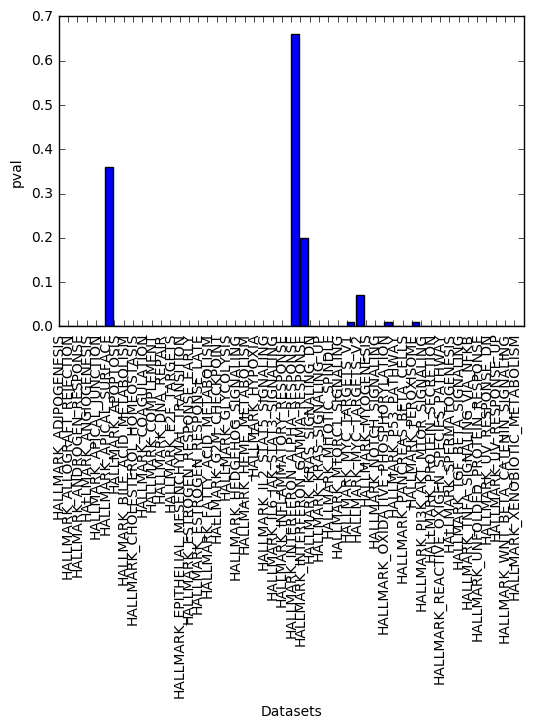

In [20]:
plt.bar(x_range,pval)
plt.xlabel('Datasets')
plt.xticks(x_range,datasets)
plt.xticks(rotation=90)
plt.ylabel("pval")
plt.show()

In [23]:
genes = list()
for i in range(len(pval)):
    print(pval[i],datasets[i])
    if(pval[i] > 0):
        genes.append(datasets[i])

0.0 HALLMARK_ADIPOGENESIS
0.0 HALLMARK_ALLOGRAFT_REJECTION
0.0 HALLMARK_ANDROGEN_RESPONSE
0.0 HALLMARK_ANGIOGENESIS
0.0 HALLMARK_APICAL_JUNCTION
0.36 HALLMARK_APICAL_SURFACE
0.0 HALLMARK_APOPTOSIS
0.0 HALLMARK_BILE_ACID_METABOLISM
0.0 HALLMARK_CHOLESTEROL_HOMEOSTASIS
0.0 HALLMARK_COAGULATION
0.0 HALLMARK_COMPLEMENT
0.0 HALLMARK_DNA_REPAIR
0.0 HALLMARK_E2F_TARGETS
0.0 HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
0.0 HALLMARK_ESTROGEN_RESPONSE_EARLY
0.0 HALLMARK_ESTROGEN_RESPONSE_LATE
0.0 HALLMARK_FATTY_ACID_METABOLISM
0.0 HALLMARK_G2M_CHECKPOINT
0.0 HALLMARK_GLYCOLYSIS
0.0 HALLMARK_HEDGEHOG_SIGNALING
0.0 HALLMARK_HEME_METABOLISM
0.0 HALLMARK_HYPOXIA
0.0 HALLMARK_IL2_STAT5_SIGNALING
0.0 HALLMARK_IL6_JAK_STAT3_SIGNALING
0.0 HALLMARK_INFLAMMATORY_RESPONSE
0.66 HALLMARK_INTERFERON_ALPHA_RESPONSE
0.2 HALLMARK_INTERFERON_GAMMA_RESPONSE
0.0 HALLMARK_KRAS_SIGNALING_DN
0.0 HALLMARK_KRAS_SIGNALING_UP
0.0 HALLMARK_MITOTIC_SPINDLE
0.0 HALLMARK_MTORC1_SIGNALING
0.01 HALLMARK_MYC_TARGETS_V1
0.07 HALLMA

In [22]:
genes

['HALLMARK_APICAL_SURFACE',
 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
 'HALLMARK_INTERFERON_GAMMA_RESPONSE',
 'HALLMARK_MYC_TARGETS_V1',
 'HALLMARK_MYC_TARGETS_V2',
 'HALLMARK_OXIDATIVE_PHOSPHORYLATION',
 'HALLMARK_PEROXISOME']